### **Load images from directory**
- Use flow_from_dataframe function to not have to save images in subfolders according to their label.
- Build pandas dataframe containing the filenames and the according labels

In [31]:
import pandas as pd
import os
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np
import random

#### **Useful functions**

In [32]:
def get_label(string):
    string  = ' '.join(string.split('/')[-1].replace('.png', '').split(' ')[0:-1])
    return string

#### **Load file names into a list and create pandas dataframe**
Need to remove .gitkeep file from list

In [33]:
path = '../data/raw/'
filenames = os.listdir(path)
filenames.remove('.gitkeep')

Build pandas dataframe

In [34]:
df = pd.DataFrame(filenames, columns=['Filenames'])

#### **Get labels from filenames**

In [35]:
# Retrieve the label from the path of the pictures
df['Label'] = df['Filenames'].apply(lambda x: get_label(x))

Check whether number of images per category is right

In [36]:
df['Label'].value_counts()

14719 flat tile corner 2x2             800
4150 flat tile round 2x2               800
3069 Flat Tile 1x2                     800
3070 Flat Tile 1x1                     800
3298 roof tile 2x3                     800
33909 plate 2 knobs 2x2                800
3622 brick 1x3                         800
3623 Plate 1x3                         800
3659 brick bow 1x4                     800
3675 roof tile outside 3x3             800
3700 Technic Brick 1x2                 800
3794 Plate 1X2 with 1 Knob             800
41677 lever 2M                         800
15672 roof tile 1x2                    800
41678 Cross Block Fork 2x2             800
4274 Connector Peg w Knob              800
4286 roof tile 1x3                     800
43093 Bush 2M friction - Cross axle    800
43857 beam 1x2                         800
4490 brick bow 1x3                     800
54200 roof tile 1x1                    800
6143 Brick D16 w cross                 800
6632 lever 3M                          800
85984 roof 

Instantiate ImageDataGenerator and then use flow_from_dataframe to get training and validation data

In [37]:
val_split = 0.1
image_size = (150, 150)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = val_split)
train_generator = datagen.flow_from_dataframe(df,
                                              directory=path,
                                              x_col='Filenames',
                                              y_col='Label',
                                              target_size=image_size,
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              subset='training')
validation_generator = datagen.flow_from_dataframe(df,
                                              directory=path,
                                              x_col='Filenames',
                                              y_col='Label',
                                              target_size=image_size,
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              subset='validation')

Found 36000 validated image filenames belonging to 50 classes.
Found 4000 validated image filenames belonging to 50 classes.


## **Put everything into one function**

In [38]:
def preprocessing(path, image_size, val_split):
    """
    path:       to directory that contains the image files,
    val_split:  specified ratio of validation to training data (= percent of all images taken for validation)
    image_size: of the images (after resizing by the data generator, needs to be the same in the model)
    
    returns training and validation DataGenerator
    """
    filenames = os.listdir(path)
    filenames.remove('.gitkeep')
    df = pd.DataFrame(filenames, columns=['Filenames'])
    
    df['Label'] = df['Filenames'].apply(lambda x: get_label(x))
    
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = val_split)
    train_generator = datagen.flow_from_dataframe(df,
                                              directory=path,
                                              x_col='Filenames',
                                              y_col='Label',
                                              target_size=image_size,
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              subset='training')
    validation_generator = datagen.flow_from_dataframe(df,
                                              directory=path,
                                              x_col='Filenames',
                                              y_col='Label',
                                              target_size=image_size,
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              subset='validation')
    
    return train_generator, validation_generator

sample image:

Sample image:


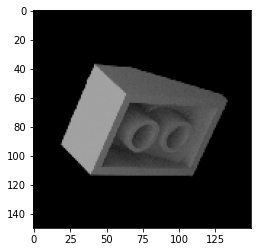

In [43]:
print("Sample image:")
img_files = [os.path.join(path, f) for f in filenames]
img_path = random.choice(img_files)
img = load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()